<a href="https://colab.research.google.com/github/Valentina9619/DIIM/blob/main/DIIM_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Functions
# q(t+1) = q(t) + K[A*q(t)+c*(t)-q(t)] (Santos et al., 2014): DOI: 10.1080/09535314.2013.872602

def DIIM(inoperability_current, recovery_matrix, interdependency_matrix, external_shock):

    interdependency_effect = interdependency_matrix @ inoperability_current
    total_effect = interdependency_effect + external_shock
    adjusted_effect = total_effect - inoperability_current
    recovery = recovery_matrix @ adjusted_effect
    inoperability_next = inoperability_current + recovery

    return inoperability_next

def sim_inoperability(A_matrix, K_matrix, initial_inop, c_vector, t_horizon):
    col = A_matrix.shape[0]
    results = np.zeros((t_horizon+1, col))
    q_t = initial_inop

    results[0, :] = initial_inop.squeeze()
    alternative_c = np.zeros_like(c_vector)

    for i in range(1, t_horizon+1):
        perturbation = c_vector if i == 1 else alternative_c
        DIIM_actual = DIIM(q_t, K_matrix, A_matrix, perturbation)
        q_t = DIIM_actual
        results[i, :] = DIIM_actual.squeeze()

    return results

def K_matrix(A_matrix, T_vector):
    log_ratio = np.log(100)  # Assuming that q_T[i] = 0.01 * q_0[i] i.e., 1% of initial inoperability as proposed by Santos et al. (2014)
    coeff_a = np.diag(A_matrix).astype(np.float64)

    denom = (1 - coeff_a) * T_vector
    denom = np.where(denom == 0, np.inf, denom)

    coeff_k = log_ratio / denom
    m_K = np.eye(len(coeff_a)) * coeff_k
    return m_K

Imagine three infrastructures, as shown in the figure. Infrastructure A influences infrastructures B and C, infrastructure B directly influences C, and infrastructure A is directly influenced by C.

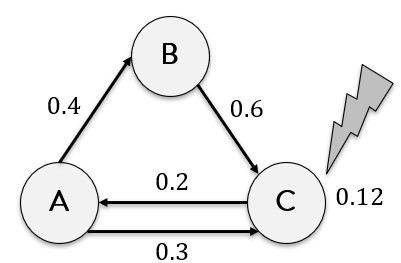

In [6]:
# Example three infrastructures
A = np.array([[0, 0, 0.3],
              [0.4, 0, 0],
              [0.2, 0.6, 0]])

recovery_t = np.array([[30], [30], [30]]) # Assuming that all infrastructures required 30 days to recovery of 99%
K = K_matrix(A, recovery_t)
print(K)

c = np.array([[0], [0], [0]])

q_0 = np.array([[0], [0], [0.12]])

ABC_inoperability = sim_inoperability(A, K, q_0, c, 50)

[[0.15350567 0.         0.        ]
 [0.         0.15350567 0.        ]
 [0.         0.         0.15350567]]


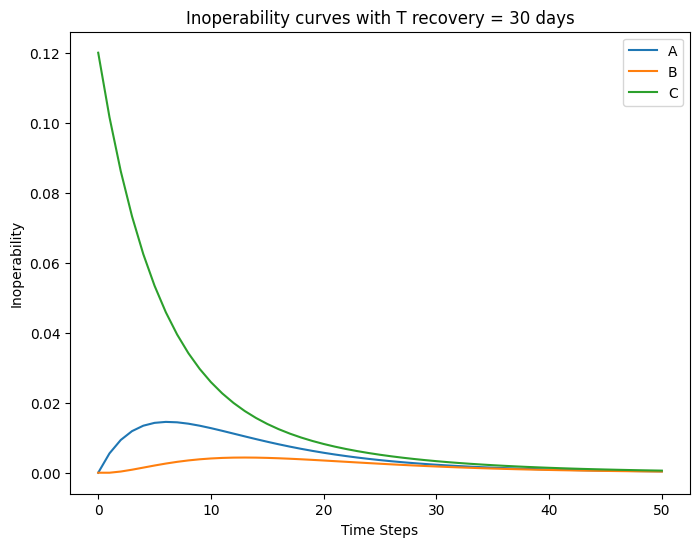

In [7]:
# Plotting the inoperability curves
time_steps = np.arange(ABC_inoperability.shape[0])

plt.figure(figsize=(8, 6))
labels = ['A', 'B', 'C']
for i in range(ABC_inoperability.shape[1]):
    plt.plot(time_steps, ABC_inoperability[:, i], label=labels[i])

plt.xlabel('Time Steps')
plt.ylabel('Inoperability')
plt.title('Inoperability curves with T recovery = 30 days')
plt.legend()
plt.show()